In [4]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import pandas as pd

# Sklearn dataset
from sklearn.datasets import fetch_20newsgroups

import requests
import zipfile
from pathlib import Path
from PIL import Image

import os
import random

# String libraries
import re
import nltk

First, let's create a Custom Dataset using random numbers, inheriting from the `Dataset` class:

In [5]:
class RandomIntDataset(Dataset):
    def __init__(self, start, stop, x, y):
        self.data = torch.randint(start, stop, (x,y))
        self.labels = torch.randint(0, 10, (x,))

    def __len__(self):
        return len(self.labels)

    def __str__(self):
        return str(torch.cat((self.data, self.labels.unsqueeze(1)), 1))

    def __getitem__(self, i):
        return self.data[i], self.labels[i]

In [6]:
dataset = RandomIntDataset(100, 1000, 500, 10)

There's some interesting properties that we may use with our custom *Dataset*:

In [14]:
len(dataset)

500

In [15]:
str(dataset)

'tensor([[779, 619, 804,  ..., 499, 265,   9],\n        [244, 943, 755,  ..., 220, 688,   9],\n        [587, 379, 261,  ..., 660, 522,   6],\n        ...,\n        [260, 759, 319,  ..., 638, 729,   6],\n        [611, 241, 974,  ..., 112, 688,   7],\n        [967, 677, 133,  ..., 209, 144,   7]])'

Also, as we are inheriting from the `Dataset` module we have the power of using batches in our data with `DataLoader`:

In [17]:
dataset_loader = DataLoader(dataset, batch_size=10, shuffle=True)
data, labels = next(iter(dataset_loader))
data

tensor([[683, 484, 235, 188, 722, 391, 935, 723, 572, 824],
        [154, 960, 672, 540, 746, 491, 173, 704, 442, 182],
        [511, 125, 257, 619, 276, 502, 537, 963, 307, 999],
        [729, 749, 271, 924, 578, 784, 337, 858, 420, 303],
        [805, 383, 557, 768, 214, 244, 739, 448, 408, 425],
        [823, 789, 699, 961, 356, 135, 433, 248, 454, 947],
        [226, 181, 478, 139, 869, 629, 177, 442, 349, 901],
        [838, 379, 330, 698, 991, 659, 635, 667, 520, 970],
        [444, 171, 988, 759, 397, 267, 758, 985, 728, 760],
        [854, 934, 190, 433, 552, 100, 822, 860, 297, 793]])

You can also combine tensor `Datasets` with `pd` loaders to create your own data: 

In [49]:
class TaxiSample(Dataset):
    def __init__(self):
        super().__init__()
        df = pd.read_csv('data/taxi_data_sample.csv')
        
        features = ['passenger_count',
                    'pickup_longitude',
                    'pickup_latitude',
                    'dropoff_longitude',
                    'dropoff_latitude']
        
        target = 'trip_duration'
        
        self.features = torch.tensor(df[features].values, 
                                     dtype=torch.float32)

        self.labels = torch.tensor(df[target].values, 
                                     dtype=torch.float32)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [57]:
# Defining data and loader
data_taxi = TaxiSample()
dataset_loader = DataLoader(data_taxi, batch_size=20, shuffle=True)

In [58]:
data_iterator = iter(dataset_loader)
data, labels = next(data_iterator)

In [60]:
data, labels

(tensor([[  1.0000, -73.9939,  40.7404, -73.9811,  40.7452],
         [  1.0000, -73.9975,  40.7417, -74.0117,  40.7078],
         [  1.0000, -73.9758,  40.7916, -73.9590,  40.7811],
         [  3.0000, -73.9726,  40.7942, -73.9869,  40.7767],
         [  5.0000, -74.0049,  40.7375, -73.9994,  40.7226],
         [  1.0000, -73.9825,  40.7685, -73.9686,  40.7647],
         [  2.0000, -73.9584,  40.7643, -73.9566,  40.7671],
         [  1.0000, -73.9780,  40.7865, -73.9697,  40.7602],
         [  1.0000, -73.9707,  40.7885, -73.9814,  40.7618],
         [  1.0000, -73.9786,  40.7410, -73.9916,  40.7392],
         [  1.0000, -73.7786,  40.6467, -73.9572,  40.7676],
         [  2.0000, -73.9700,  40.7892, -73.9644,  40.7548],
         [  1.0000, -73.9863,  40.7458, -73.9772,  40.7436],
         [  1.0000, -73.9558,  40.7643, -73.9670,  40.7600],
         [  1.0000, -74.0075,  40.7429, -73.9946,  40.7504],
         [  1.0000, -73.9650,  40.8001, -73.9466,  40.8061],
         [  1.0000, -74.

# Image Data

Our datasets can also be consisted of images or other type. For example, let's ingest a folder of data containing cats and dogs into `pytorch`:

In [11]:
# Check if directory exists
data_path = Path("data/dogs_cats")

if data_path.is_dir():
    print(f"directory exists.")

directory exists.


In [12]:
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [13]:
walk_through_dir(data_path)

There are 2 directories and 0 images in 'data\dogs_cats'.
There are 0 directories and 15 images in 'data\dogs_cats\cats'.
There are 0 directories and 20 images in 'data\dogs_cats\dogs'.


In [53]:
random.seed(42)

image_dogs_list = list((data_path/'dogs').glob("*.jpg"))
image_cats_list = list((data_path/'cats').glob("*.jpg"))

In [54]:
image_paths = image_cats_list + image_dogs_list

Random image path: data\dogs_cats\dogs\dog.2726.jpg
Image class: dogs
Image height: 374
Image width: 500


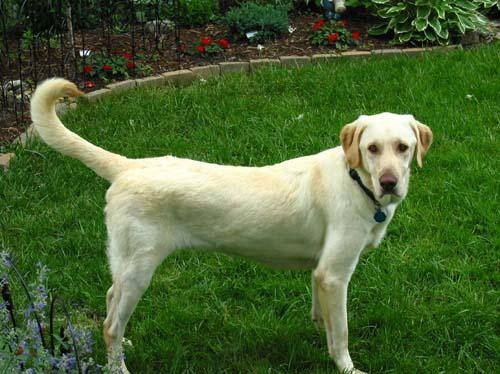

In [55]:
# Let's extract some information about our stored images 
random.seed(20)

random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

We need to turn our image into tensors! How? That's where we can `torchvision`!

In [45]:
# Here we're building a torch image pipeline using transforms.Compose

data_transform = transforms.Compose([
    # Resize the image
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal - this is a step for data augmentation
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()])

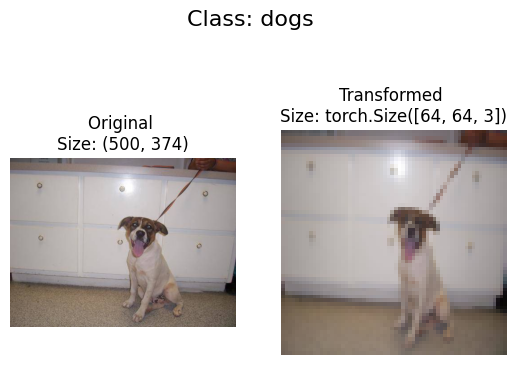

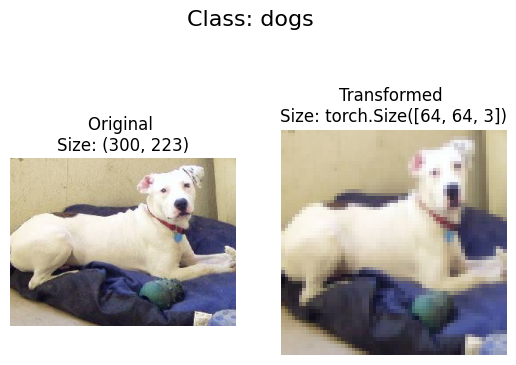

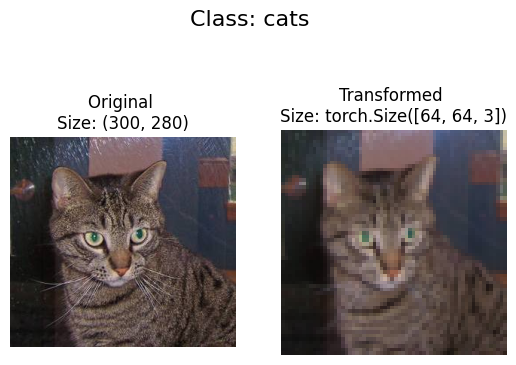

In [56]:
# Let's now check some of our images and respective transformation
# using imshow

def plot_transformed_images(image_paths, transform, n=3, seed=30):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")
            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths, 
                        transform=data_transform, 
                        n=3)

We can also use the handy `ImageFolder` to create our own dataset very fast:

In [58]:
train_data = datasets.ImageFolder(root=data_path,
                                  transform=data_transform,
                                  target_transform=None)

In [59]:
train_data

Dataset ImageFolder
    Number of datapoints: 35
    Root location: data\dogs_cats
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [60]:
# Now we have interesting attributes to get from the train_data object
class_names = train_data.classes
class_names

['cats', 'dogs']

Want our cats and dogs in tensor format? Right away! 

In [61]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.8118, 0.8353, 0.8667,  ..., 0.9725, 0.9686, 0.9529],
         [0.8118, 0.8353, 0.8667,  ..., 0.9725, 0.9686, 0.9569],
         [0.8157, 0.8392, 0.8667,  ..., 0.9725, 0.9686, 0.9647],
         ...,
         [0.6392, 0.6510, 0.6667,  ..., 0.0118, 0.0118, 0.0118],
         [0.6275, 0.6392, 0.6549,  ..., 0.0118, 0.0118, 0.0118],
         [0.6078, 0.6235, 0.6431,  ..., 0.0078, 0.0078, 0.0078]],

        [[0.6588, 0.6824, 0.7020,  ..., 0.8431, 0.8196, 0.8000],
         [0.6588, 0.6784, 0.7020,  ..., 0.8510, 0.8314, 0.8118],
         [0.6549, 0.6784, 0.6980,  ..., 0.8549, 0.8431, 0.8275],
         ...,
         [0.5059, 0.5176, 0.5255,  ..., 0.0157, 0.0157, 0.0118],
         [0.4941, 0.5059, 0.5137,  ..., 0.0157, 0.0157, 0.0118],
         [0.4863, 0.4980, 0.5098,  ..., 0.0078, 0.0078, 0.0078]],

        [[0.3569, 0.3765, 0.3961,  ..., 0.5412, 0.5059, 0.4824],
         [0.3569, 0.3765, 0.3961,  ..., 0.5569, 0.5255, 0.4980],
         [0.3608, 0.3804, 0.3961,  ..., 0.55

.. and how to turn images into `DataLoaders`? Easy!

In [64]:
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=5,
                              num_workers=1, 
                              shuffle=True) 

train_dataloader

And now we have an iterable!

In [65]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([5, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([5])


We have 5 images and 5 labels!

In [68]:
img

tensor([[[[0.4980, 0.5490, 0.5176,  ..., 0.4431, 0.4431, 0.5020],
          [0.4706, 0.5255, 0.4902,  ..., 0.4353, 0.4157, 0.4784],
          [0.4784, 0.5294, 0.4902,  ..., 0.4549, 0.4275, 0.4706],
          ...,
          [0.6118, 0.6118, 0.6118,  ..., 0.2745, 0.2902, 0.3608],
          [0.6039, 0.6000, 0.6078,  ..., 0.4078, 0.4157, 0.4392],
          [0.5922, 0.5882, 0.6000,  ..., 0.6039, 0.6235, 0.6431]],

         [[0.4510, 0.5098, 0.4902,  ..., 0.2667, 0.2667, 0.3255],
          [0.4235, 0.4863, 0.4627,  ..., 0.2627, 0.2431, 0.3020],
          [0.4235, 0.4863, 0.4549,  ..., 0.2824, 0.2549, 0.2980],
          ...,
          [0.4235, 0.4235, 0.4235,  ..., 0.1569, 0.1608, 0.2549],
          [0.4196, 0.4157, 0.4235,  ..., 0.2863, 0.2824, 0.3333],
          [0.4118, 0.4078, 0.4157,  ..., 0.4549, 0.4667, 0.5176]],

         [[0.4235, 0.4941, 0.4784,  ..., 0.2471, 0.2471, 0.3059],
          [0.3961, 0.4706, 0.4510,  ..., 0.2275, 0.2118, 0.2706],
          [0.4000, 0.4706, 0.4471,  ..., 0

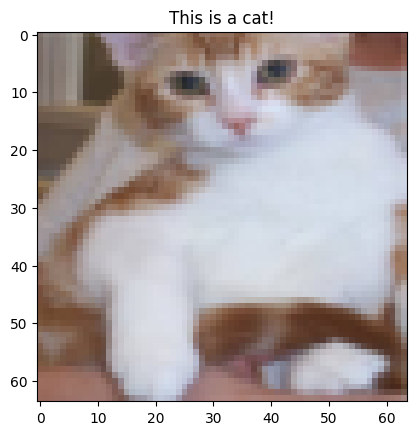

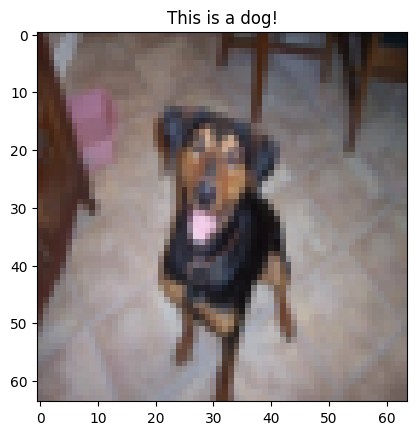

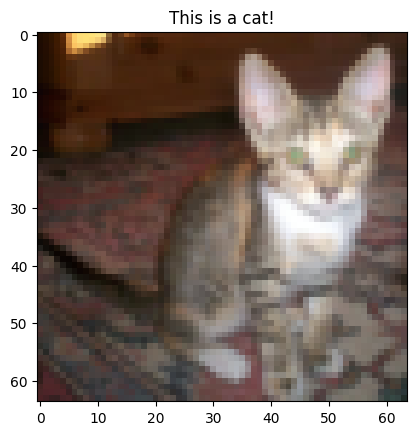

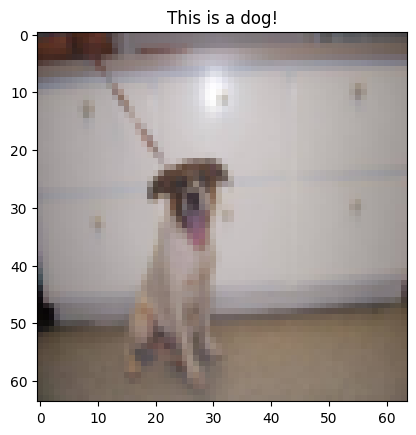

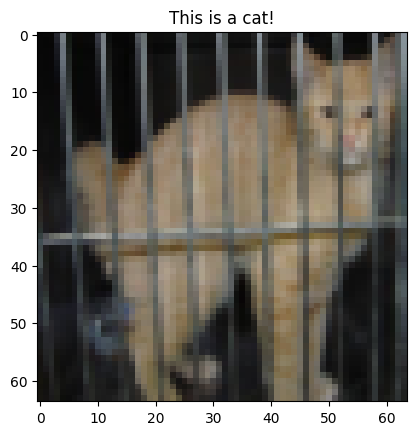

In [72]:
for i, image in enumerate(img):
    plt.imshow(image.numpy().transpose((1, 2, 0)))
    image_class = label[i]
    
    if image_class == 0:
        plt.title('This is a cat!')
    else:
        plt.title('This is a dog!')
    plt.show()

# Text Data

In [8]:
categories = [
 'comp.os.ms-windows.misc',
 'rec.sport.baseball',
 'rec.sport.hockey',
]

In [9]:
dataset = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, remove=('headers', 'footers', 'quotes'))
corpus = [item for item in dataset['data']]
corpus[0:10]

['\nIt also runs OS/2 character based apps and POSIX apps.  The DOS, 16bit\nand 32 bit windows apps run in a windows 32 bit subsystem.\n\nIf you consider the fact that NT has:\n the Lanman redirectors,\n built in support for TCP/IP\n built in support for NETBEUI\n comes with TCP utils like ping and an ftp client, etc\n applications like schedule+ and a 32 bit version of msmail\n\nthe storage argument isnt an issue.\n\n\nI ran it on a 486 with 8MRAM and it did a ton of disk swapping, with a 19M\nvirtual memory paging file.  It functioned but it crawled.  (this was the OCT\nbuild)\n\nI upgraded the machine to 16M and the performance is good,\nAt that point I installed the March Build.  Consider they\nare probably still working on the feature set, and havent done a lot of fine\ntuning to the code yet.\n\n\nI have little info on Chicago so I cant make a comparison.  Is it in Beta?  Is\nthere anyone out there who has tested both and cares to make a comparison?\nJust my $0.02  ',
 "Hi all,\n

In [10]:
def preprocess_text(text: str) -> str:
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    tokens = nltk.word_tokenize(text.lower())
    return tokens

Let's build the vocab for our text:

In [11]:
def get_vocab(training_corpus):

    # add special characters
    # padding, end of line, unknown term
    vocab = {'__PAD__': 0, '__</e>__': 1, '__UNK__': 2} 

    for item in training_corpus: 
        processed_text = preprocess_text(item)
        processed_text.sort()
        for word in processed_text:
            if word not in vocab:
                vocab[word] = len(vocab) 
    return vocab

vocab = get_vocab(corpus)

In [12]:
vocab

{'__PAD__': 0,
 '__</e>__': 1,
 '__UNK__': 2,
 'a': 3,
 'also': 4,
 'an': 5,
 'and': 6,
 'anyone': 7,
 'applications': 8,
 'apps': 9,
 'are': 10,
 'argument': 11,
 'at': 12,
 'based': 13,
 'beta': 14,
 'bit': 15,
 'both': 16,
 'build': 17,
 'built': 18,
 'but': 19,
 'cant': 20,
 'cares': 21,
 'character': 22,
 'chicago': 23,
 'client': 24,
 'code': 25,
 'comes': 26,
 'comparison': 27,
 'consider': 28,
 'crawled': 29,
 'did': 30,
 'disk': 31,
 'done': 32,
 'dos': 33,
 'etc': 34,
 'fact': 35,
 'feature': 36,
 'file': 37,
 'fine': 38,
 'for': 39,
 'ftp': 40,
 'functioned': 41,
 'good': 42,
 'has': 43,
 'have': 44,
 'havent': 45,
 'i': 46,
 'if': 47,
 'in': 48,
 'info': 49,
 'installed': 50,
 'ip': 51,
 'is': 52,
 'isnt': 53,
 'issue': 54,
 'it': 55,
 'just': 56,
 'lanman': 57,
 'like': 58,
 'little': 59,
 'lot': 60,
 'm': 61,
 'machine': 62,
 'make': 63,
 'march': 64,
 'memory': 65,
 'mram': 66,
 'msmail': 67,
 'my': 68,
 'netbeui': 69,
 'nt': 70,
 'oct': 71,
 'of': 72,
 'on': 73,
 'os': 

In [13]:
len(vocab)

26303

We have a vocab of size 26303!

In [14]:
def text_to_tensor(text: str, vocab_dict: dict, unk_token='__UNK__'):    
    word_l = preprocess_text(text)
        
    # initialize empty tensor
    tensor_l = [] 
    
    # take the __UNK__ value from the vocabulary 
    unk_ID = vocab_dict[unk_token]
            
    # for each word in the lsit:
    for word in word_l:
        # take the index
        # if the word is not in vocab_dict, then assign UNK
        word_ID = vocab_dict.get(word, unk_ID)
        # append to tensor list
        tensor_l.append(word_ID)

    return tensor_l

In [15]:
snippet = corpus[0][0:200]

print('The text: "{}" is represented by {}'.format(snippet, text_to_tensor(snippet, vocab)))

The text: "
It also runs OS/2 character based apps and POSIX apps.  The DOS, 16bit
and 32 bit windows apps run in a windows 32 bit subsystem.

If you consider the fact that NT has:
 the Lanman redirectors,
 buil" is represented by [55, 4, 85, 74, 22, 13, 9, 6, 80, 9, 97, 33, 15, 6, 15, 110, 9, 84, 48, 3, 110, 15, 91, 47, 114, 28, 97, 35, 96, 70, 43, 97, 57, 83, 2]


In [16]:
torch.tensor(text_to_tensor(snippet, vocab))

tensor([ 55,   4,  85,  74,  22,  13,   9,   6,  80,   9,  97,  33,  15,   6,
         15, 110,   9,  84,  48,   3, 110,  15,  91,  47, 114,  28,  97,  35,
         96,  70,  43,  97,  57,  83,   2])

Take note that here we're just emulating `stoi` (string-to-int) and not encapsulating any meaning into our tensor. To encapsulate meaning, we need to produce Word Vectors that are a mathematical concept that capture semantic relationships between words (https://dzone.com/articles/introduction-to-word-vectors). For example Word2Vec (https://en.wikipedia.org/wiki/Word2vec).